In [188]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pylab import *
import os
import scipy.stats as si
import sympy as sy
from matplotlib import rc

In [189]:
plt.style.use('default')
rc('text', usetex=False)

In [190]:
def d1(S, K, T, r, sigma,t):
    return (np.log(S / K) + (r + 0.5 * sigma ** 2) * (T-t)) / (sigma * np.sqrt(T-t))

In [191]:
def d2(S, K, T, r, sigma,t):
    #return (np.log(S / K) + (r - 0.5 * sigma ** 2) * (T-t)) / (sigma * np.sqrt(T-t))
    return d1(S, K, T, r, sigma,t) - sigma*np.sqrt(T-t)

In [192]:
def call(S, K, T, r, sigma,t):
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: interest rate
    #sigma: volatility of underlying asset
    if T - t > 0:
        d1val = d1(S, K, T, r, sigma,t)
        d2val  = d2(S, K, T, r, sigma,t) 
        call_val = (S * si.norm.cdf(d1val, 0.0, 1.0) - K * np.exp(-r * (T-t)) * si.norm.cdf(d2val, 0.0, 1.0))
    elif T-t == 0:
        call_val = np.max([S-K,0])
    else:
        print("Error")
    return call_val


In [193]:
call(S, K_Call, T, r, sigma,0)

9.978334714277711

In [194]:
def put(S, K, T, r, sigma,t):
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: interest rate
    #sigma: volatility of underlying asset
    if T - t > 0:
        d1val = d1(S, K, T, r, sigma,t)
        d2val  = d2(S, K, T, r, sigma,t) 
        put_val = (K * np.exp(-r * (T-t)) * si.norm.cdf(-d2val, 0.0, 1.0) - S * si.norm.cdf(-d1val, 0.0, 1.0))
        #put_val= (-S * si.norm.cdf(-d1val, 0.0, 1.0) + K * np.exp(-r * (T-t)) * si.norm.cdf(-d2val, 0.0, 1.0))
    elif T-t == 0:
        put_val = np.max([K-S,0])
    else:
        print("Error")
    return put_val


In [195]:
S = 10
K = 16
T = 50
r = 0.01
sigma = 0.1

call_val = np.zeros(T)
for i in range(T): 
    call_val[i] = put(S, K, T, r, sigma,i)

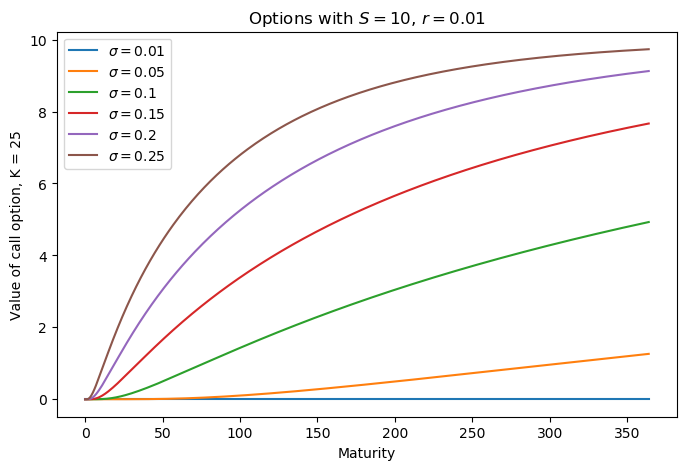

In [262]:
fig, ax = plt.subplots(figsize = (8,5))

plt.title(r'Options with $S = 10$, $r = 0.01$')
ax.set_xlabel('Maturity')
S = 10
K = 25
T = 365
r = 0.15**365

ax.set_ylabel('Value of call option, K = ' + str(K), color='black')

for sigma in [0.01,0.05,0.1,0.15,0.20,0.25]:
    call_val = np.zeros(T)
    maturity = np.zeros(T)
    for i in range(T): 
        call_val[i] = call(S, K, T, r, sigma,i+1)
        maturity[i] = T-i-1
    ax.plot(maturity,call_val, label = r'$\sigma =$' +str(sigma))

ax.legend()
plt.show()

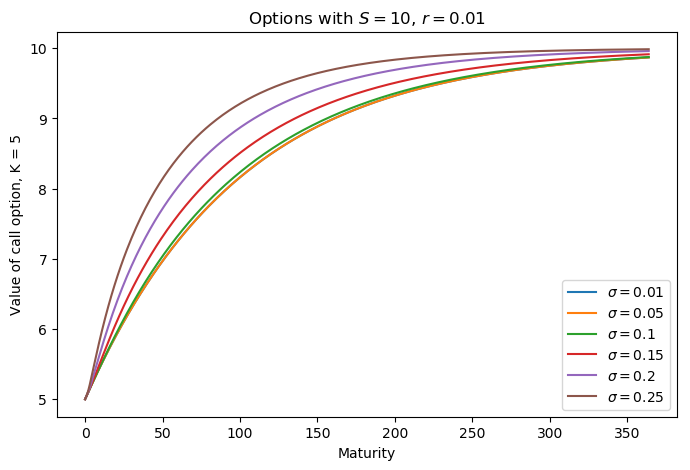

In [197]:
fig, ax = plt.subplots(figsize = (8,5))

S = 10
K = 5
T = 365
r = 0.01
plt.title(r'Options with $S = 10$, $r = 0.01$')
ax.set_xlabel('Maturity')
ax.set_ylabel('Value of call option, K = ' + str(K), color='black')

for sigma in [0.01,0.05,0.1,0.15,0.20,0.25]:
    call_val = np.zeros(T)
    maturity = np.zeros(T)
    for i in range(T): 
        call_val[i] = call(S, K, T, r, sigma,i+1)
        maturity[i] = T-i-1
    ax.plot(maturity, call_val, label = r'$\sigma =$' +str(sigma))

ax.legend()
plt.show()

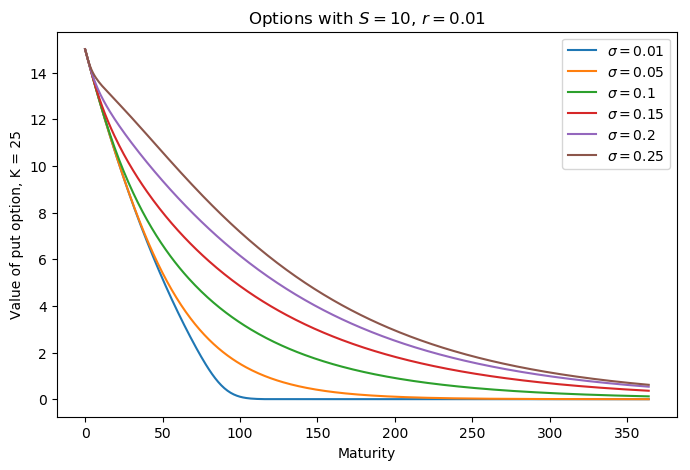

In [259]:
fig, ax = plt.subplots(figsize = (8,5))

plt.title(r'Options with $S = 10$, $r = 0.01$')
ax.set_xlabel('Maturity')

S = 10
K = 25
T = 365
r = 0.01

ax.set_ylabel('Value of put option, K = ' + str(K), color='black')

for sigma in [0.01,0.05,0.1,0.15,0.20,0.25]:
    put_val = np.zeros(T)
    maturity = np.zeros(T)
    for i in range(T): 
        put_val[i] = put(S, K, T, r, sigma,i+1)
        maturity[i] = T-i-1
    ax.plot(maturity, put_val, label = r'$\sigma =$' +str(sigma))

ax.legend()
plt.show()

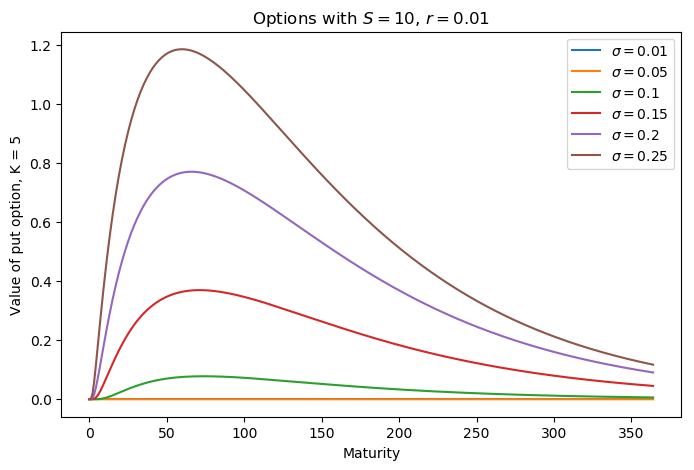

In [199]:
fig, ax = plt.subplots(figsize = (8,5))

plt.title(r'Options with $S = 10$, $r = 0.01$')
ax.set_xlabel('Maturity')

S = 10
K = 5
T = 365
r = 0.01

ax.set_ylabel('Value of put option, K = ' + str(K), color='black')

for sigma in [0.01,0.05,0.1,0.15,0.20,0.25]:
    put_val = np.zeros(T)
    maturity = np.zeros(T)
    for i in range(T): 
        put_val[i] = put(S, K, T, r, sigma,i+1)
        maturity[i] = T-i-1
    ax.plot(maturity, put_val, label = r'$\sigma =$' +str(sigma))

ax.legend()
plt.show()

In [200]:
def function_call (S, K, T, r, sigma,t): 
    call_val = np.zeros(T)
    for i in range(T): 
        call_val[i] = call(S[i], K, T, r, sigma,i+1)
    return call_val

In [201]:
def function_put(S, K, T, r, sigma,t):
    put_val = np.zeros(T)
    for i in range(T): 
        put_val[i] = put(S[i], K, T, r, sigma,i+1)
    return put_val

In [245]:
def Brownian_movement(T): 
    w = np.zeros(T)
    for k in range(1,T):
        w[k] = w[k-1] + np.sqrt(1/T)*np.random.normal(0,1)
        #w[k] = w[k-1] + np.random.normal(0,1)
    return w    

T = 10
N = 100
D = np.rand.

In [246]:
def simulation(S0, T,t, mu, sigma,w) : 
    #mu : expected return of the underlying
    
    S = np.zeros(T)
    S[0] = S0

    for i in range(1,T):
       # S[i] = S[i-1]*(1+mu+sigma*w[i-1])
         S[i] = S0*exp((mu - (sigma**2)/2)*t[i]+sigma*w[i])
    return S